In [47]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
cd C:\Users\zihao\OneDrive - UWM\Documents\CIV 590 UTP\hw\HW4\

C:\Users\zihao\OneDrive - UWM\Documents\CIV 590 UTP\hw\HW4


# Problem 1

## Compute shorest path

In [49]:
# Grab edge list data 
edgelist = pd.read_csv('edges.csv')

In [50]:
nodelist = pd.read_csv('nodes.csv',error_bad_lines=False)

In [82]:
# nodelist.head(5)

In [52]:
# Create empty graph
g = nx.Graph()

In [53]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
#     g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    g.add_edge(elrow[0], elrow[1], weight= elrow[2])

In [54]:
g.edges

EdgeView([('A1', '2'), ('A1', '5'), ('2', '3'), ('2', '6'), ('3', '4'), ('3', '7'), ('4', 'C8'), ('5', '6'), ('5', 'B9'), ('6', '7'), ('7', 'C8'), ('7', '10'), ('C8', '11'), ('B9', '10'), ('10', '11'), ('10', '12'), ('11', 'D13'), ('12', 'D13')])

In [55]:
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']].update(nlrow[1:].to_dict())  ## 
#     print (nlrow['id'])
#     print (nlrow[1:].to_dict())

In [56]:
print(nlrow)

id    D13
x      13
y     -12
Name: 12, dtype: object


In [57]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 18
# of nodes: 13


In [58]:
# Define data structure (list) of edge colors for plotting
edge_weight = [e[2]['weight'] for e in g.edges(data=True)]
labels = nx.get_edge_attributes(g,'weight')

In [60]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['x'], -node[1]['y']) for node in g.nodes(data=True)}


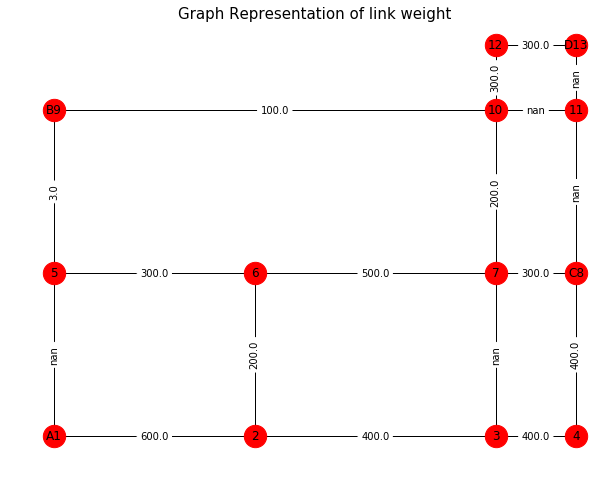

In [79]:
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, node_size=500, node_color='red',with_labels=True)
nx.draw_networkx_edge_labels(g, pos=node_positions,edge_labels=labels)
plt.title('Graph Representation of link weight', size=15)
plt.show()

In [72]:
nx.shortest_path(g,'A1','C8',"weight")

['A1', '2', '3', '4', 'C8']

In [63]:
nx.shortest_path(g,'A1','D13',"weight")

['A1', '2', '6', '7', '10', '12', 'D13']

In [64]:
nx.shortest_path(g,'B9','C8',"weight")

['B9', '5', '6', '7', 'C8']

In [65]:
nx.shortest_path(g,'B9','D13',"weight")

['B9', '10', '12', 'D13']

## All-or-Nothing result

In [73]:
# Grab edge list data 
edgelist = pd.read_csv('edges_impedance.csv')
nodelist = pd.read_csv('nodes.csv',error_bad_lines=False)
G = nx.Graph()

In [74]:
for i, elrow in edgelist.iterrows():
#     g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    G.add_edge(elrow[0], elrow[1], weight= elrow[2])
    
for i, nlrow in nodelist.iterrows():
    G.node[nlrow['id']].update(nlrow[1:].to_dict())  ## 

In [77]:
# Define data structure (list) of edge colors for plotting
edge_weight = [e[2]['weight'] for e in G.edges(data=True)]
labels = nx.get_edge_attributes(G,'weight')
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['x'], -node[1]['y']) for node in G.nodes(data=True)}

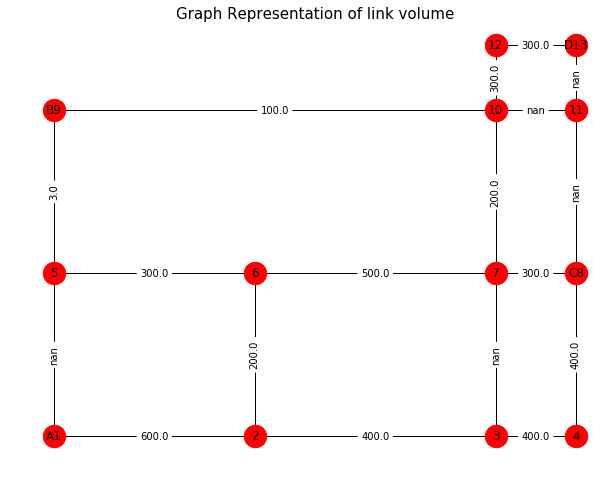

In [80]:
plt.figure(figsize=(8, 6))
nx.draw(G, pos=node_positions, node_size=500, node_color='red',with_labels=True)
nx.draw_networkx_edge_labels(G, pos=node_positions,edge_labels=labels)
plt.title('Graph Representation of link volume', size=15)
plt.show()